In [133]:
import os

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from patsy import dmatrices
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
data_file = os.path.join('..', 'github_data.csv')
data = pd.read_csv(data_file)

In [5]:
data['giniXavg_min_path'] = data['gini_coefficient'] * data['avg_min_path']
data['giniXclustering'] = data['gini_coefficient'] * data['avg_clustering']
data['clusteringXavg_min_path'] = data['avg_clustering'] * data['avg_min_path']

data['giniXavg_min_pathXcrowd_pct'] = data['gini_coefficient'] * data['avg_min_path'] * data['crowd_pct']
data['giniXclusteringXcrowd_pct'] = data['gini_coefficient'] * data['avg_clustering'] * data['crowd_pct']
data['clusteringXavg_min_pathXcrowd_pct'] = data['avg_clustering'] * data['avg_min_path'] * data['crowd_pct']

In [12]:
def add_cross_terms(df, crowd_pct):
    df = df.copy()
    
    df['crowd_pct'] = crowd_pct
    df['crowd_pct_2'] = crowd_pct**2
    
    df['giniXcrowd_pct'] = df['gini_coefficient'] * df['crowd_pct']
    df['avg_clusteringXcrowd_pct'] = df['avg_clustering'] * df['crowd_pct']
    df['avg_min_pathXcrowd_pct'] = df['avg_min_path'] * df['crowd_pct']
    
    df['giniXavg_min_pathXcrowd_pct'] = df['gini_coefficient'] * df['avg_min_path'] * df['crowd_pct']
    df['giniXclusteringXcrowd_pct'] = df['gini_coefficient'] * df['avg_clustering'] * df['crowd_pct']
    df['clusteringXavg_min_pathXcrowd_pct'] = df['avg_clustering'] * df['avg_min_path'] * df['crowd_pct']
    
    return df

## Read in Regression Models

In [80]:
volume_formula = """
issues_over_time ~ crowd_pct + crowd_pct_2 + avg_clustering + 
    gini_coefficient + avg_clusteringXcrowd_pct + 
    avg_min_pathXcrowd_pct  + total_contributors + 
    project_age
"""
y, X = dmatrices(volume_formula,
                 data=data, return_type='dataframe')
mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
issue_volume_res = mod.fit()
print(1 - (issue_volume_res.deviance/issue_volume_res.null_deviance))
print(issue_volume_res.summary())

0.6559281199095996
                 Generalized Linear Model Regression Results                  
Dep. Variable:       issues_over_time   No. Observations:                  562
Model:                            GLM   Df Residuals:                      553
Model Family:                   Gamma   Df Model:                            8
Link Function:                    log   Scale:                         0.39390
Method:                          IRLS   Log-Likelihood:                -1277.1
Date:                Sun, 26 Apr 2020   Deviance:                       168.43
Time:                        12:04:55   Pearson chi2:                     218.
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inter

<ipython-input-80-c0c12f41b4a1>:9: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))


In [79]:
comment_formula = """
avg_comments ~ crowd_pct + crowd_pct_2  + avg_min_path + gini_coefficient +
    avg_min_pathXcrowd_pct + giniXavg_min_path + giniXclustering + clusteringXavg_min_path +
    giniXavg_min_pathXcrowd_pct + giniXclusteringXcrowd_pct + clusteringXavg_min_pathXcrowd_pct +
    topic_4 +  topic_6 + topic_7 + topic_8 + topic_9 + topic_10 + topic_11 + topic_13 + topic_14 
    + topic_16 + topic_17 + topic_18 + topic_20 + topic_21 + topic_22 + topic_23 
"""
y, X = dmatrices(comment_formula, data=data, return_type='dataframe')
mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
avg_comments_res = mod.fit()
print(1 - (avg_comments_res.deviance/avg_comments_res.null_deviance))
print(avg_comments_res.summary())

0.430139159949779
                 Generalized Linear Model Regression Results                  
Dep. Variable:           avg_comments   No. Observations:                  562
Model:                            GLM   Df Residuals:                      534
Model Family:                   Gamma   Df Model:                           27
Link Function:                    log   Scale:                        0.047461
Method:                          IRLS   Log-Likelihood:                -616.41
Date:                Sun, 26 Apr 2020   Deviance:                       21.636
Time:                        12:04:46   Pearson chi2:                     25.3
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------

<ipython-input-79-d8a160dd0c4f>:9: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))


In [171]:
response_time_formula = """
avg_first_comment ~ crowd_pct + crowd_pct_2 + avg_clustering + avg_min_path +
    avg_clusteringXcrowd_pct  + gini_coefficient + gini_coefficientXcrowd_pct + 
    project_age 
"""
y, X = dmatrices(response_time_formula,
                 data=data, return_type='dataframe')
mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
response_time_res = mod.fit()
print(1 - (response_time_res.deviance/response_time_res.null_deviance))
print(response_time_res.summary())

0.4188593021520183
                 Generalized Linear Model Regression Results                  
Dep. Variable:      avg_first_comment   No. Observations:                  562
Model:                            GLM   Df Residuals:                      553
Model Family:                   Gamma   Df Model:                            8
Link Function:                    log   Scale:                         0.77270
Method:                          IRLS   Log-Likelihood:                -2297.8
Date:                Sun, 26 Apr 2020   Deviance:                       348.25
Time:                        13:13:33   Pearson chi2:                     427.
No. Iterations:                    15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
I

<ipython-input-171-9842462a58d3>:8: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))


In [172]:
close_out_formula = """
avg_active_time ~ crowd_pct + avg_min_path + avg_clusteringXcrowd_pct + 
    avg_min_pathXcrowd_pct + gini_coefficientXcrowd_pct + project_age + 
    nodes
"""
y, X = dmatrices(close_out_formula,
                 data=data, return_type='dataframe')
mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))
close_out_res = mod.fit()
print(1 - (close_out_res.deviance/close_out_res.null_deviance))
print(close_out_res.summary())

0.5108781505611536
                 Generalized Linear Model Regression Results                  
Dep. Variable:        avg_active_time   No. Observations:                  562
Model:                            GLM   Df Residuals:                      554
Model Family:                   Gamma   Df Model:                            7
Link Function:                    log   Scale:                         0.29622
Method:                          IRLS   Log-Likelihood:                -2662.1
Date:                Sun, 26 Apr 2020   Deviance:                       152.10
Time:                        13:13:59   Pearson chi2:                     164.
No. Iterations:                    17                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
I

<ipython-input-172-33fdd3f849fc>:8: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  mod = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log))


## Use Models to Predict Measures of Effectiveness

In [95]:
data_by_crowd_pct = []
for crowd_pct in np.linspace(0, 1, 21):
    data_by_crowd_pct.append(add_cross_terms(data, crowd_pct=crowd_pct))
data_by_crowd_pct = pd.concat(data_by_crowd_pct)

data_by_crowd_pct.sort_values(['package', 'crowd_pct'], inplace=True)
data_by_crowd_pct = data_by_crowd_pct.merge(data[['package', 'organization', 'crowd_pct']],
                                            on=['package', 'organization'],
                                            suffixes=['', '_actual'])
data_by_crowd_pct = data_by_crowd_pct[abs(data_by_crowd_pct['crowd_pct'] - data_by_crowd_pct['crowd_pct_actual']) < .15]
data_by_crowd_pct.reset_index(drop=True, inplace=True)

In [173]:
y, X = dmatrices(comment_formula, data=data_by_crowd_pct, return_type='dataframe')
data_by_crowd_pct['p_avg_comments'] = avg_comments_res.predict(X)
y, X = dmatrices(volume_formula, data=data_by_crowd_pct, return_type='dataframe')
data_by_crowd_pct['p_issue_volume'] = issue_volume_res.predict(X)
y, X = dmatrices(response_time_formula, data=data_by_crowd_pct, return_type='dataframe')
data_by_crowd_pct['p_response_time'] = response_time_res.predict(X)
y, X = dmatrices(close_out_formula, data=data_by_crowd_pct, return_type='dataframe')
data_by_crowd_pct['p_close_out_time'] = close_out_res.predict(X)

## Trade Off Space Plots

In [175]:
'hello_there'.title().replace('_', ' ')

'Hello There'

In [191]:
def plot_tradeoff_space(organization, package, measure1, measure2):
    plot_data = data_by_crowd_pct[(data_by_crowd_pct['package'] == package) &
                                   (data_by_crowd_pct['organization'] == organization)]

    fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2,2)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    
    label1 = measure1.title().replace('_', ' ')
    label2 = measure2.title().replace('_', ' ')

    crowd_pct_actual = list(plot_data['crowd_pct_actual'])[0]
    fig.suptitle(f'{label1} vs. {label2} | {package} (Crowd Pct={round(crowd_pct_actual, 2)})')


    ax11.plot(plot_data[f'p_{measure1}'], plot_data[f'p_{measure2}'])
    ax11.set_title('Trade Off Space')
    ax11.set(xlabel=f'{label1}', ylabel=f'{label2}')


    img = mpimg.imread(f'../network_plots/network-{organization}-{package}.png')
    ax12.imshow(img)
    ax12.axis('off')

    ax21.plot(plot_data['crowd_pct'], plot_data[f'p_{measure1}'])
    ax21.set_title(f'{label1}')
    ax21.set(xlabel='Crowd Pct', ylabel=f'{label1}')
    ax21.axvline(x=crowd_pct_actual, color='red')

    ax22.plot(plot_data['crowd_pct'], plot_data[f'p_{measure2}'])
    ax22.set_title(f'{label2}')
    ax22.set(xlabel='Crowd Pct', ylabel=f'{label2}')
    ax22.axvline(x=crowd_pct_actual, color='red')

### Cython - Centralized

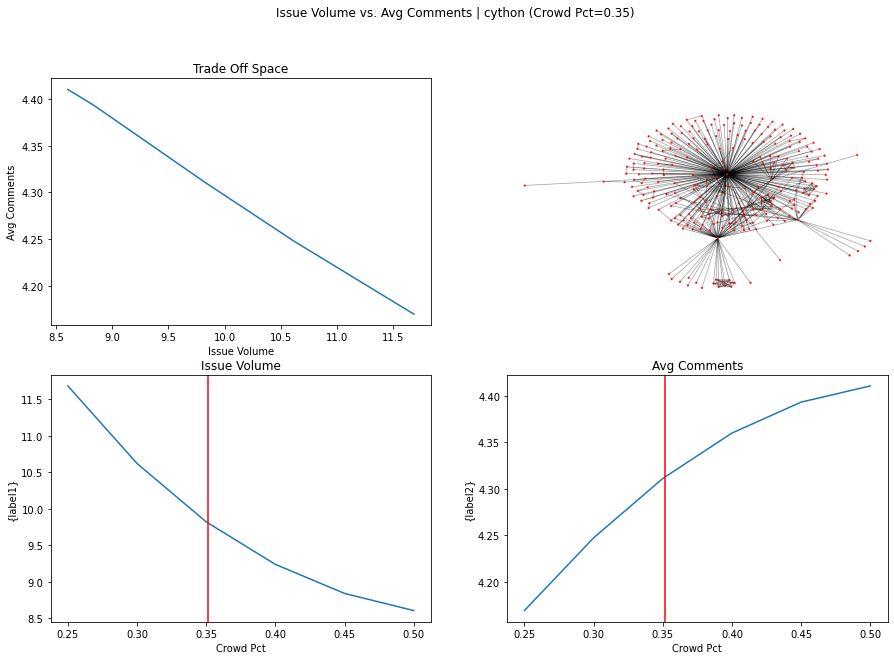

In [182]:
plot_tradeoff_space('cython', 'cython', 'issue_volume', 'avg_comments')

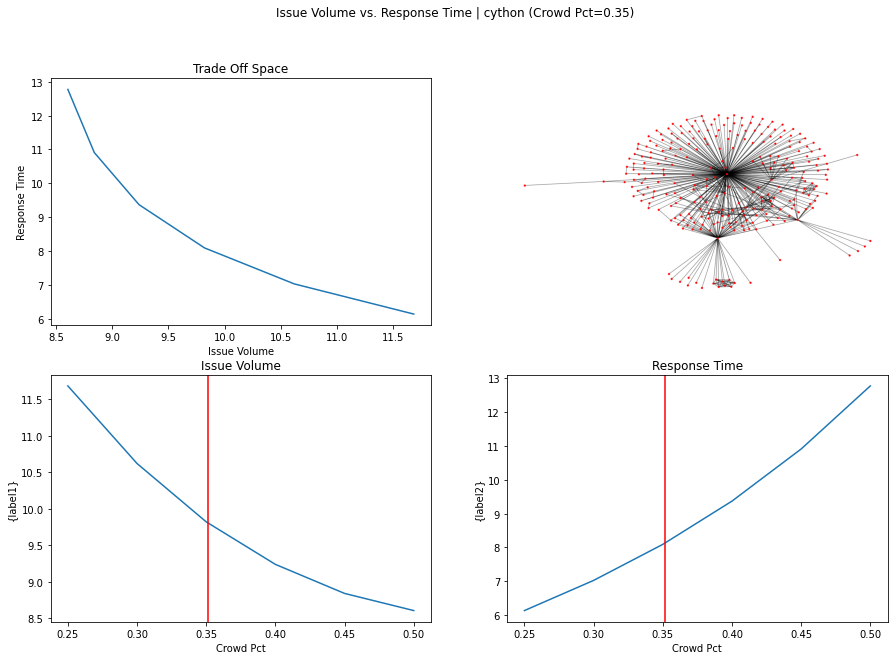

In [188]:
plot_tradeoff_space('cython', 'cython', 'issue_volume', 'response_time')

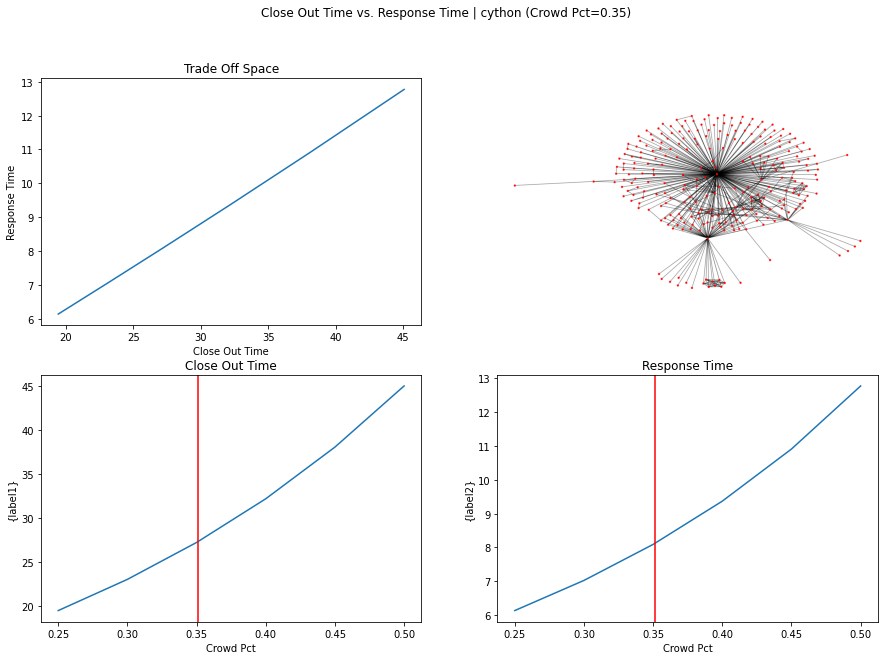

In [186]:
plot_tradeoff_space('cython', 'cython', 'close_out_time', 'response_time')

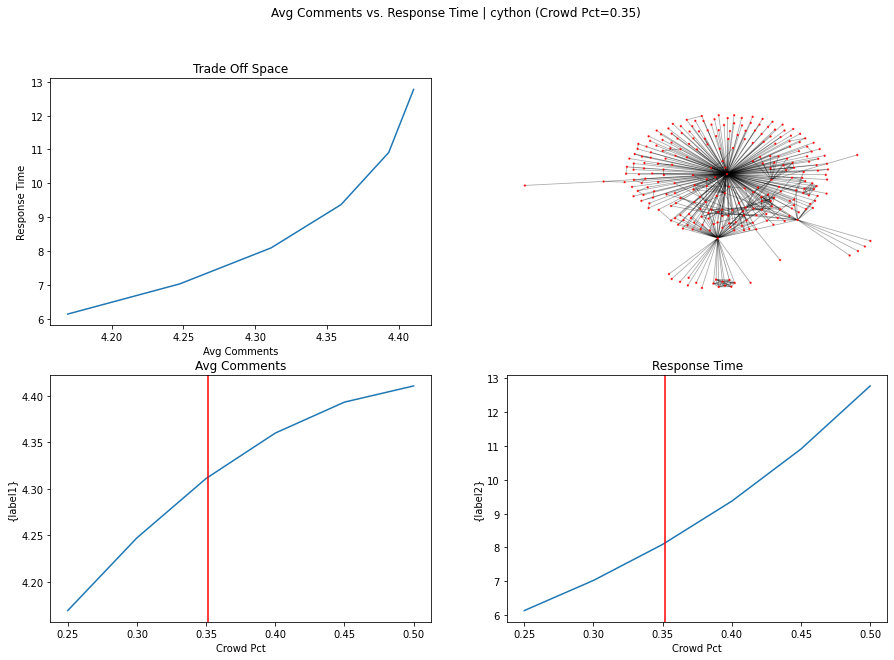

In [189]:
plot_tradeoff_space('cython', 'cython', 'avg_comments', 'response_time')

### Derive4j - Low level of crowd sourcing

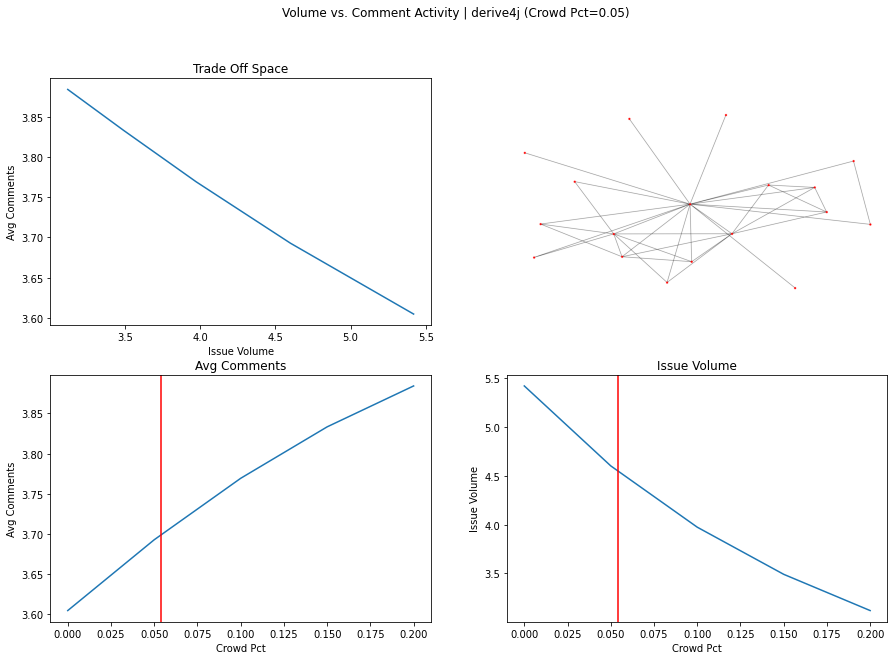

In [168]:
plot_tradeoff_space('derive4j', 'derive4j', 'issue_volume', 'avg_comments')

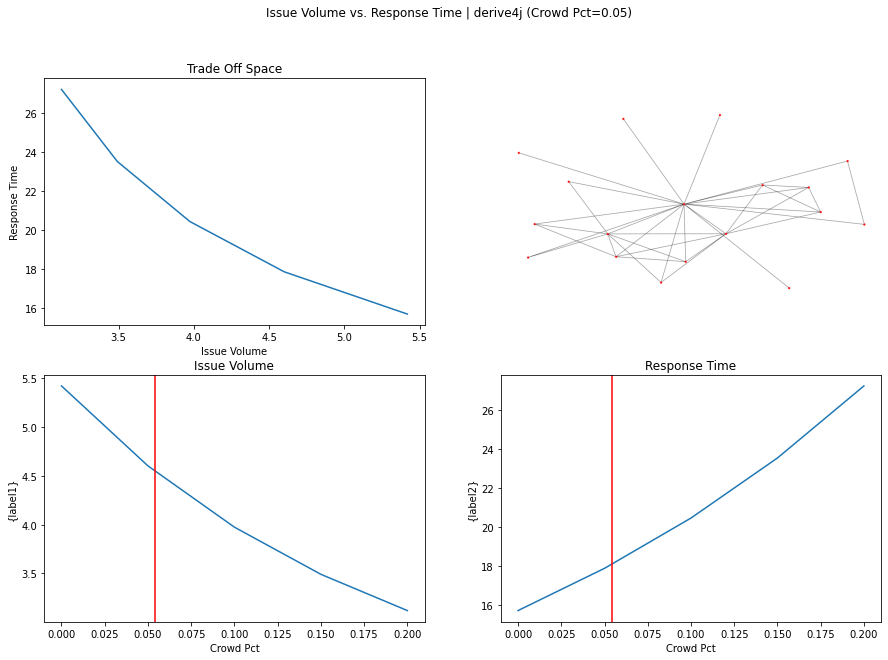

In [190]:
plot_tradeoff_space('derive4j', 'derive4j', 'issue_volume', 'response_time')

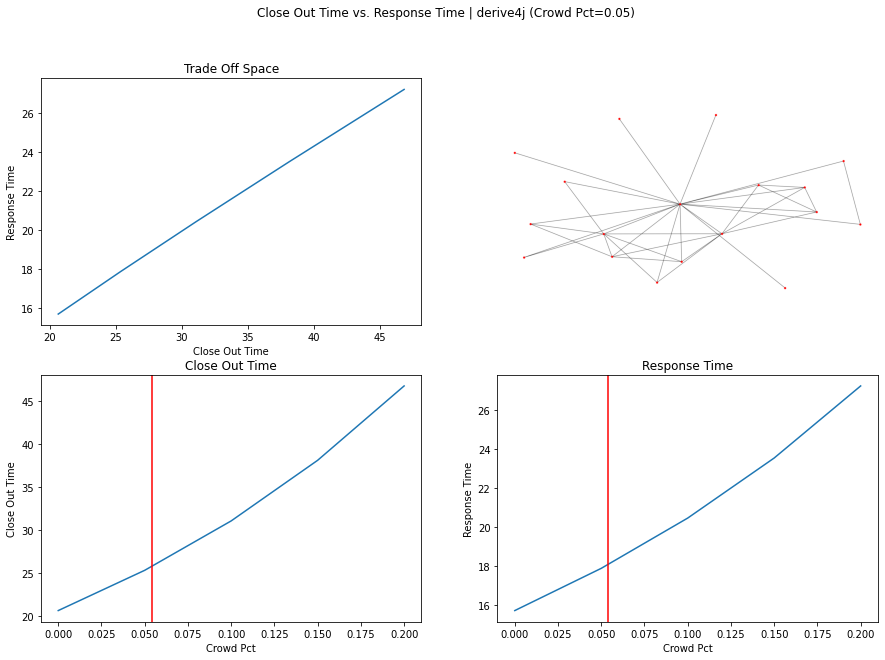

In [192]:
plot_tradeoff_space('derive4j', 'derive4j', 'close_out_time', 'response_time')

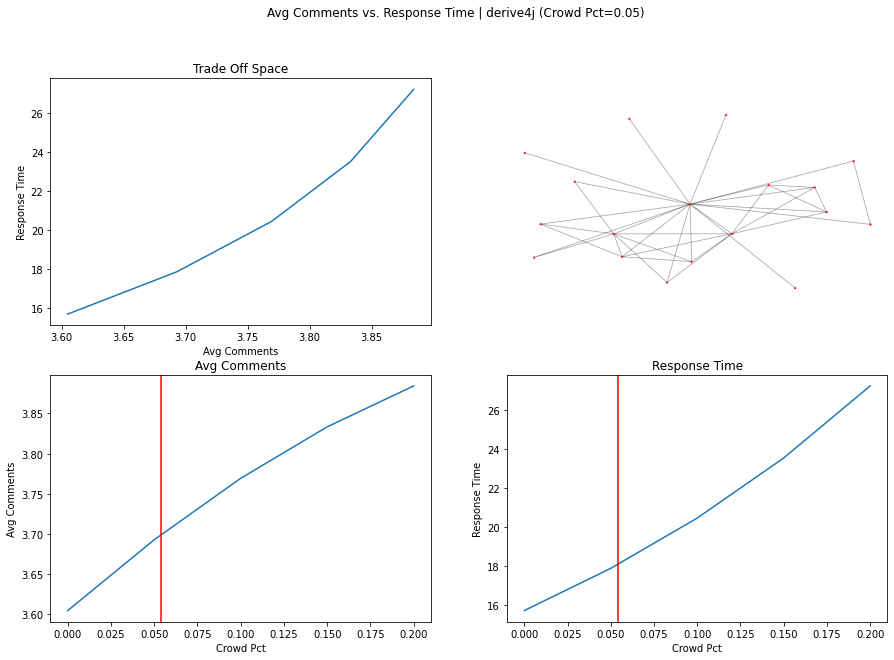

In [193]:
plot_tradeoff_space('derive4j', 'derive4j', 'avg_comments', 'response_time')

### AWS SDK - Multiple Hubs

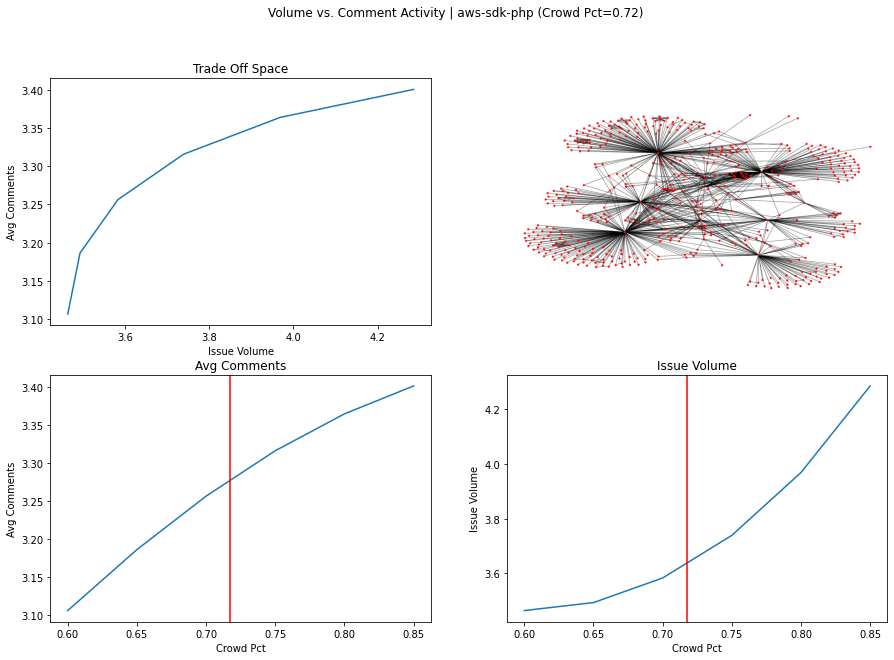

In [161]:
plot_tradeoff_space('aws', 'aws-sdk-php', 'issue_volume', 'avg_comments')

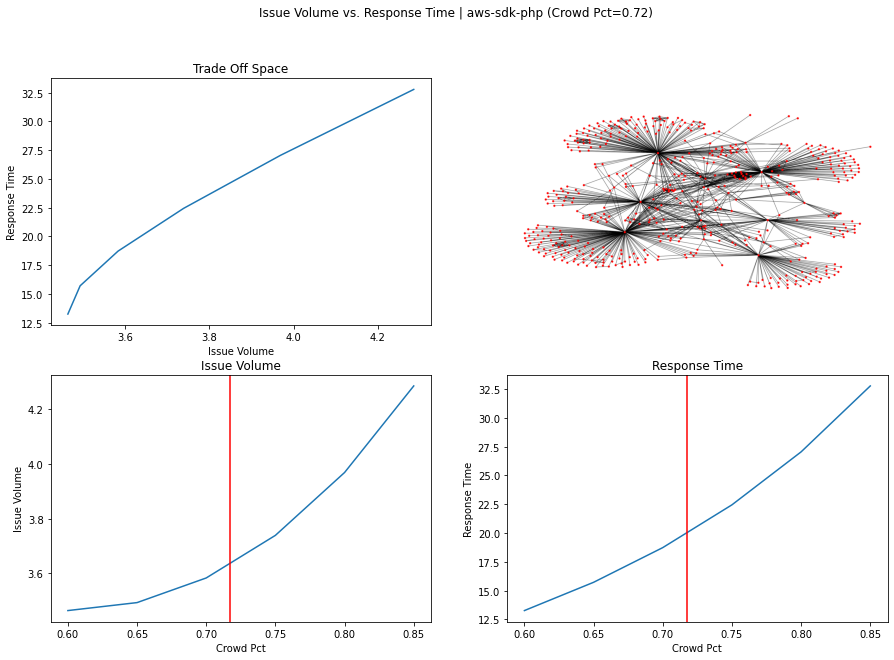

In [195]:
plot_tradeoff_space('aws', 'aws-sdk-php', 'issue_volume', 'response_time')

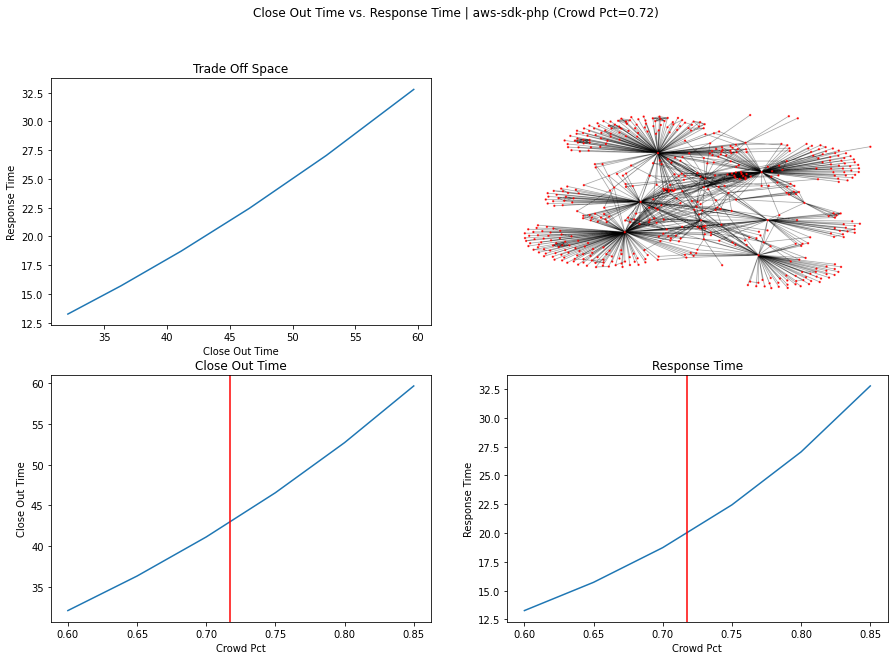

In [196]:
plot_tradeoff_space('aws', 'aws-sdk-php', 'close_out_time', 'response_time')

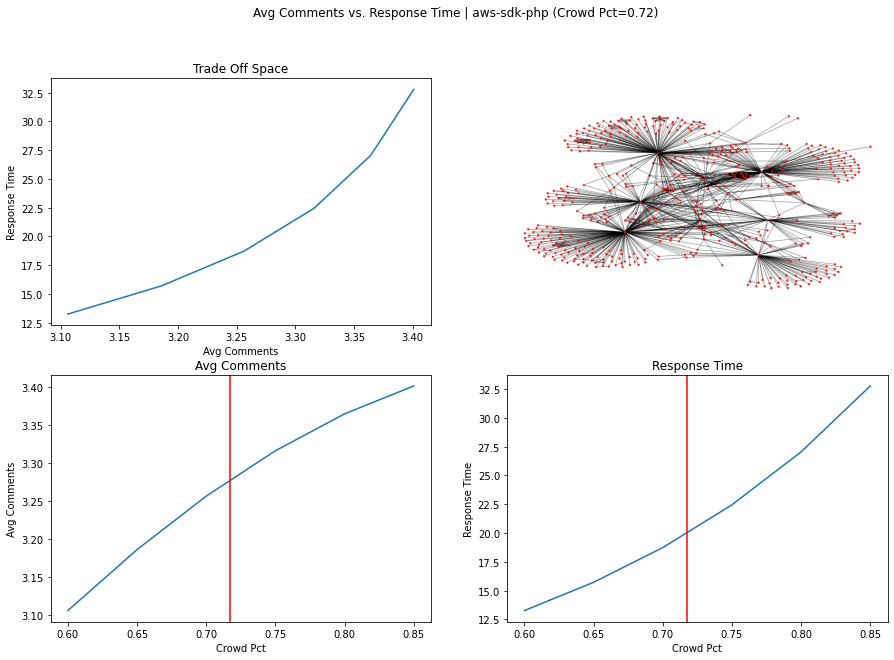

In [197]:
plot_tradeoff_space('aws', 'aws-sdk-php', 'avg_comments', 'response_time')

### Keystone - High localized clustering

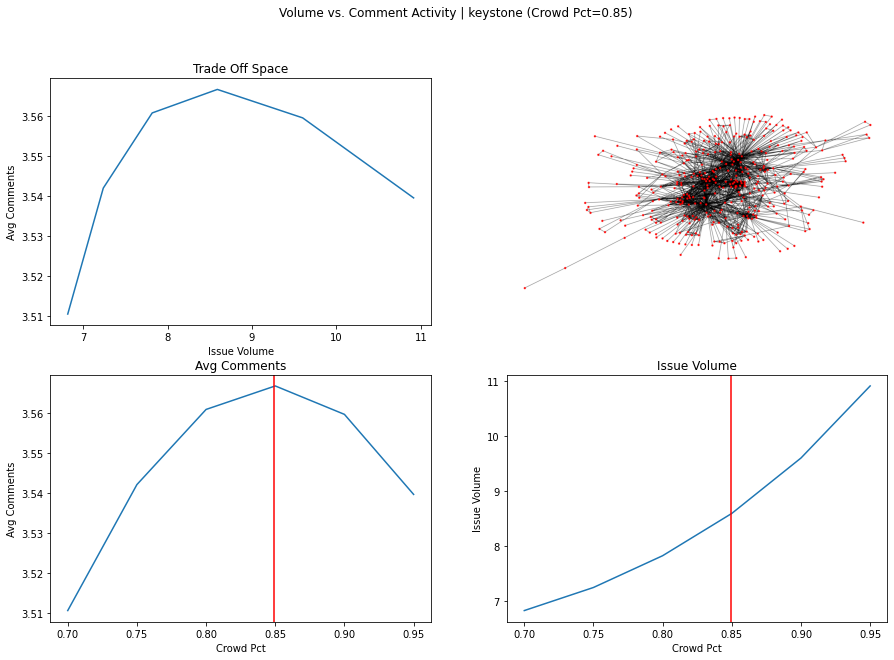

In [164]:
plot_tradeoff_space('keystonejs', 'keystone', 'issue_volume', 'avg_comments')

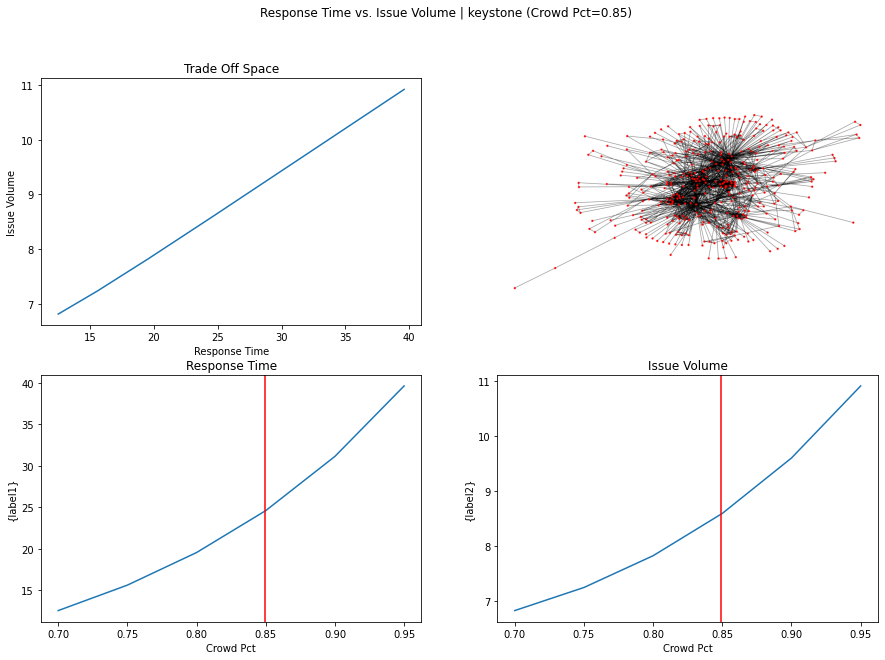

In [184]:
plot_tradeoff_space('keystonejs', 'keystone', 'response_time', 'issue_volume')

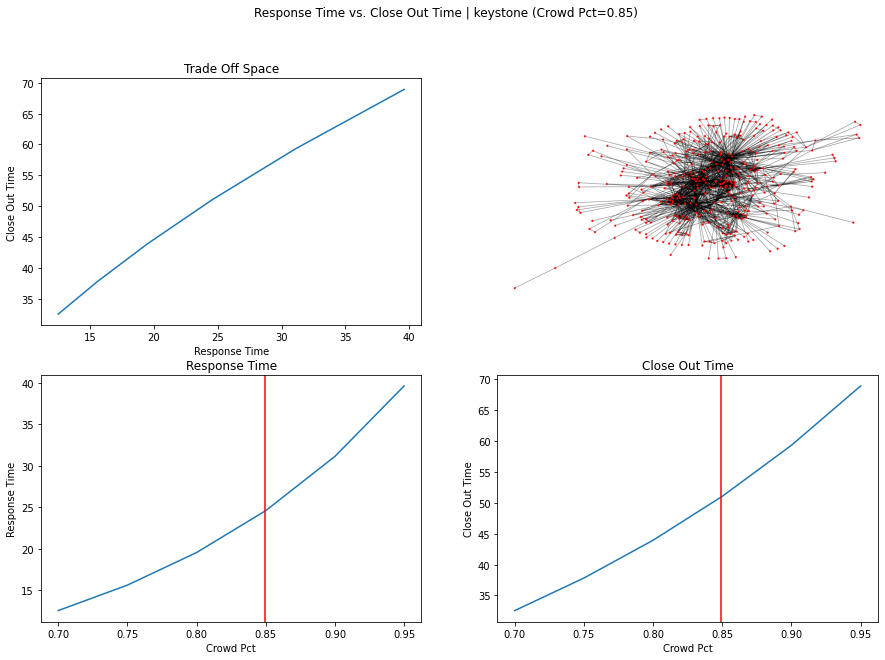

In [198]:
plot_tradeoff_space('keystonejs', 'keystone', 'response_time', 'close_out_time')

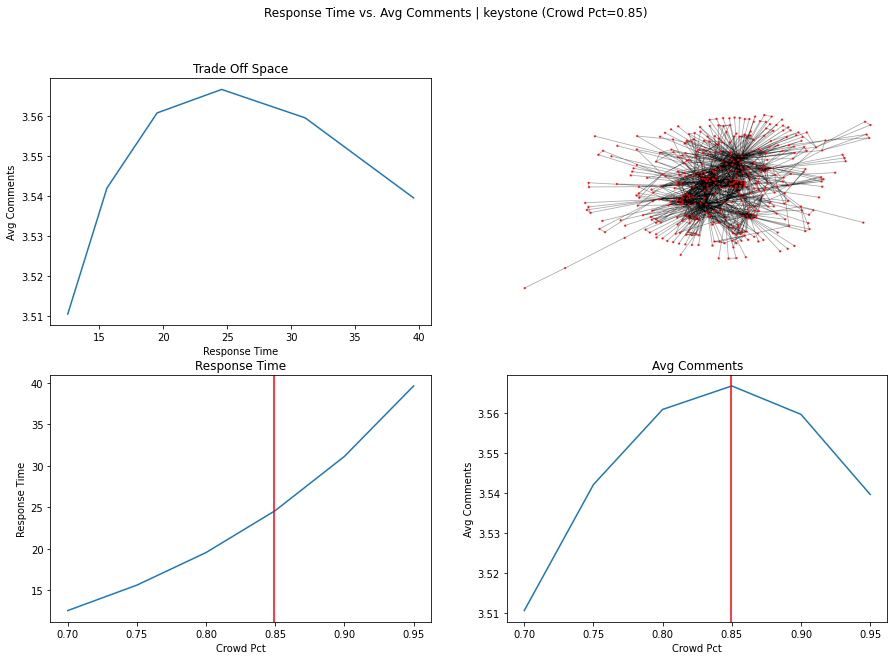

In [199]:
plot_tradeoff_space('keystonejs', 'keystone', 'response_time', 'avg_comments')